In [1]:
%config Completer.use_jedi = False
%matplotlib inline

import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean as cmo
import os.path
import nc_time_axis

mpl.rcParams['figure.figsize'] = 12, 8
mpl.rcParams['font.size'] = 16

In [4]:
dfile = '/home/disk/eos15/apauling/seaice/nsidc_sic.nc'

ds = xr.open_dataset(dfile)
ds

<xarray.Dataset>
Dimensions:    (time: 446, x: 304, y: 448)
Coordinates:
  * x          (x) int64 0 1 2 3 4 5 6 7 8 ... 296 297 298 299 300 301 302 303
  * y          (y) int64 0 1 2 3 4 5 6 7 8 ... 440 441 442 443 444 445 446 447
    lat        (x, y) float64 ...
    lon        (x, y) float64 ...
  * time       (time) datetime64[ns] 1978-11-01 1978-12-01 ... 2015-12-01
    hole_mask  (time, y, x) bool ...
Data variables:
    sic        (time, x, y) float64 ...

In [5]:
sic = ds['sic']
sic

<xarray.DataArray 'sic' (time: 446, x: 304, y: 448)>
[60741632 values with dtype=float64]
Coordinates:
  * x          (x) int64 0 1 2 3 4 5 6 7 8 ... 296 297 298 299 300 301 302 303
  * y          (y) int64 0 1 2 3 4 5 6 7 8 ... 440 441 442 443 444 445 446 447
    lat        (x, y) float64 ...
    lon        (x, y) float64 ...
  * time       (time) datetime64[ns] 1978-11-01 1978-12-01 ... 2015-12-01
    hole_mask  (time, y, x) bool ...

In [6]:
print(sic.dims)

('time', 'x', 'y')


In [7]:
print(sic.coords)

Coordinates:
  * x          (x) int64 0 1 2 3 4 5 6 7 8 ... 296 297 298 299 300 301 302 303
  * y          (y) int64 0 1 2 3 4 5 6 7 8 ... 440 441 442 443 444 445 446 447
    lat        (x, y) float64 ...
    lon        (x, y) float64 ...
  * time       (time) datetime64[ns] 1978-11-01 1978-12-01 ... 2015-12-01
    hole_mask  (time, y, x) bool ...


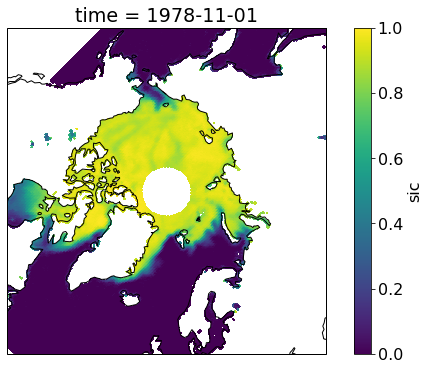

In [8]:
fig = plt.figure(1, figsize=(10,6))
axs = plt.axes(projection=ccrs.NorthPolarStereo())
axs.coastlines()
axs.set_extent([-180,180,55,90], crs=ccrs.PlateCarree())
sic[0,:,:].plot.pcolormesh('lon', 'lat', ax=axs, transform=ccrs.PlateCarree())

NameError: name 'sic' is not defined

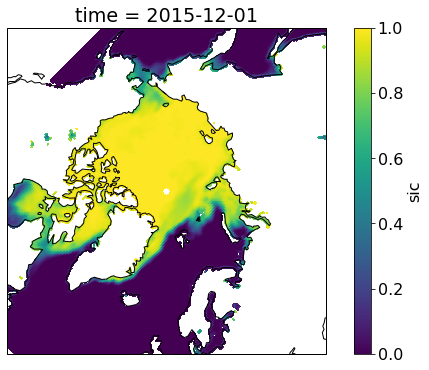

In [9]:
fig = plt.figure(1, figsize=(10,6))
axs = plt.axes(projection=ccrs.NorthPolarStereo())
axs.coastlines()
axs.set_extent([-180,180,55,90], crs=ccrs.PlateCarree())
sic[len(sic['time'])-1,:,:].plot.pcolormesh('lon', 'lat', ax=axs, transform=ccrs.PlateCarree())

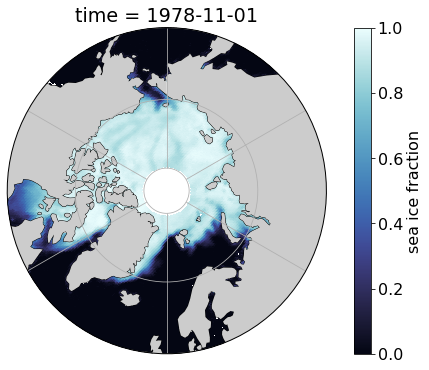

In [10]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

fig = plt.figure(1, figsize=(10,6))
axs = plt.axes(projection=ccrs.NorthPolarStereo())
axs.coastlines()
gl = axs.gridlines(draw_labels=False, xlocs=None, ylocs=[55, 70, 85])
gl.n_steps = 90

axs.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', facecolor='0.8'))
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
axs.set_boundary(circle, transform=axs.transAxes)
axs.set_extent([-180, 180, 55, 90], crs=ccrs.PlateCarree())
sic[0,:,:].plot.pcolormesh('lon','lat', ax=axs, transform=ccrs.PlateCarree(), 
                           cmap=cmo.cm.ice, cbar_kwargs={'label': 'sea ice fraction'})

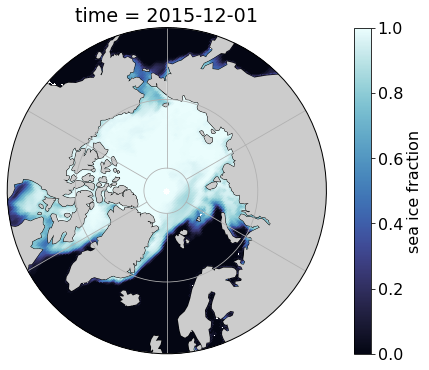

In [11]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

fig = plt.figure(1, figsize=(10,6))
axs = plt.axes(projection=ccrs.NorthPolarStereo())
axs.coastlines()
gl = axs.gridlines(draw_labels=False, xlocs=None, ylocs=[55, 70, 85])
gl.n_steps = 90

axs.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '110m', facecolor='0.8'))
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
axs.set_boundary(circle, transform=axs.transAxes)
axs.set_extent([-180, 180, 55, 90], crs=ccrs.PlateCarree())
sic[445,:,:].plot.pcolormesh('lon','lat', ax=axs, transform=ccrs.PlateCarree(), 
                           cmap=cmo.cm.ice, cbar_kwargs={'label': 'sea ice fraction'})

In [13]:
mpl.rcParams['figure.figsize'] = 12, 8
mpl.rcParams['font.size'] = 16

# Open the CESM data into an xarray Dataset
ddir = '/home/disk/eos15/apauling/seaice'
dfile = 'b.e11.B20TRC5CNBDRD.f09_g16.005.cice.h.aice_sh.192001-200512.nc'
ncF = os.path.join(ddir, dfile)
ds = xr.open_dataset(ncF)

# Get out the ice fraction and grid cell area, then multiply them. Xarray is smart enough to figure out
# that you want to multiply at every time, since the dimension names of area match those in aice, so you
# don't need to create a new time dimension for the area like you would in MATLAB
aice = ds['aice']/100
area = ds['tarea']
siarea = aice*area/1e12

# Compute the sea ice area by summing over the dimensions associated with lat and lon.
# For CESM these are called 'nj' and 'ni'
si_tseries = siarea.sum(dim=('nj', 'ni'))



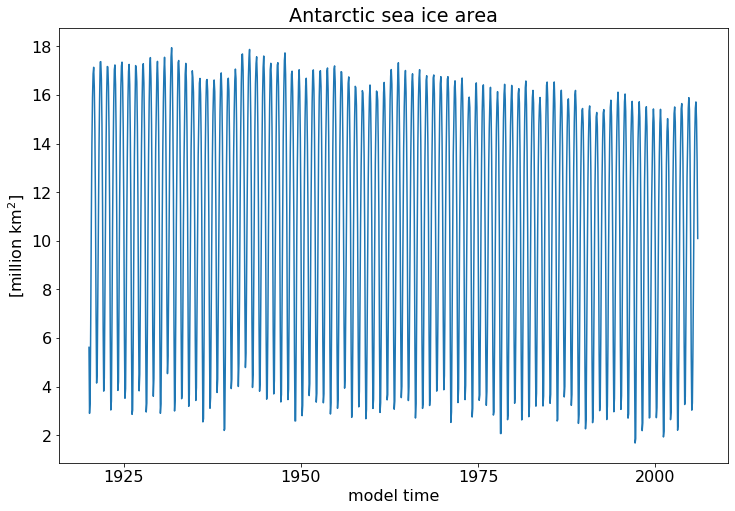

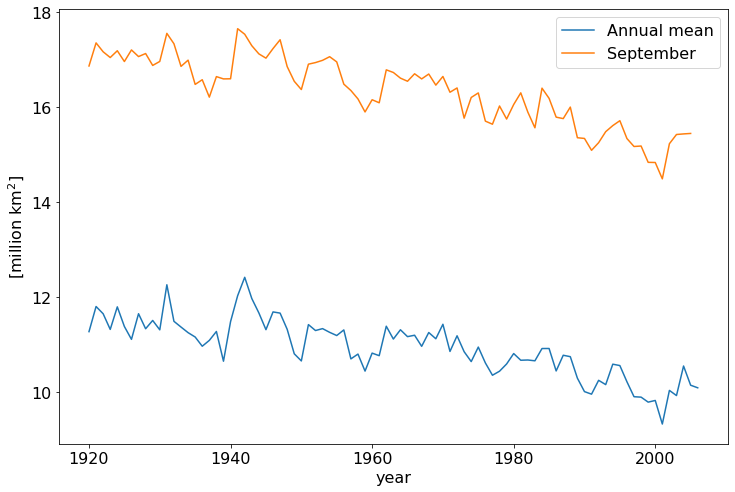

In [14]:
fig = plt.figure(1)
si_tseries.plot()
plt.title('Antarctic sea ice area')
plt.ylabel('[million km$^2$]')

# Now lets plot the annual mean by grouping the timeseries by year and then averaging over time.
# This makes the dimension of the variable 'year' rather than 'time'
siANN = si_tseries.groupby('time.year').mean('time')
siANN = siANN.rename({'year': 'time'})

# Now let's just do September
si_sept = si_tseries.sel(time=slice('1920-09', '2005-09', 12))
# Hack to make the x-coordinate the same as the annual mean,
# otherwise they don't plot on the same figure nicely
si_sept = si_sept.groupby('time.year').mean(dim='time')

fig2 = plt.figure(2)
siANN.plot(label='Annual mean')
si_sept.plot(label='September')
plt.ylabel('[million km$^2$]')
plt.legend()

In [11]:
import cftime

In [12]:
cftime.__version__

'1.0.4.2'

In [13]:
xr.__version__

'0.14.0'